Requirement: The data must be linearly seperable.

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, class_sep = 10, hypercube = False )

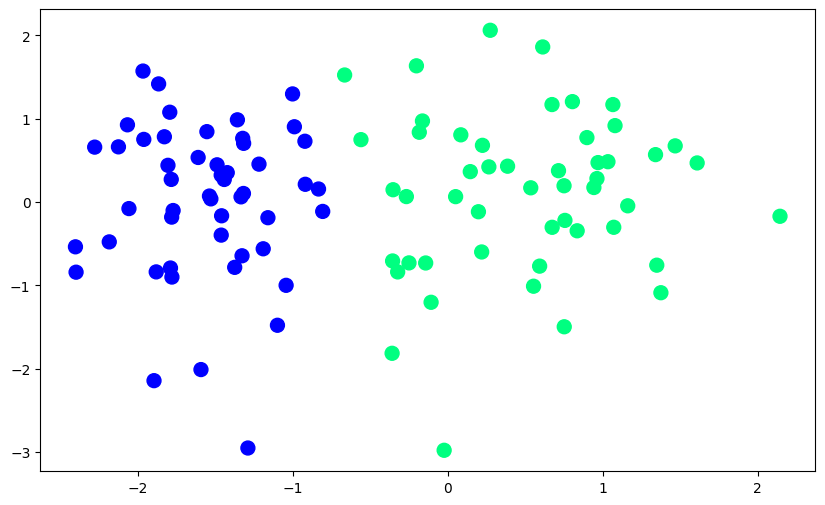

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)

In [5]:
def step(z):
  return 1 if z>0 else 0

## Perceptron Trick

In [6]:
epochs = 1000
def perceptron(X,y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(epochs):
    ind = np.random.randint(0,100)
    y_hat = step(np.dot(X[ind], weights))
    weights = weights + lr * (y[ind]- y_hat)*X[ind]
  return weights[0], weights[1:]

In [7]:
intercept_, coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

1.0
[1.35652037 0.13157955]


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

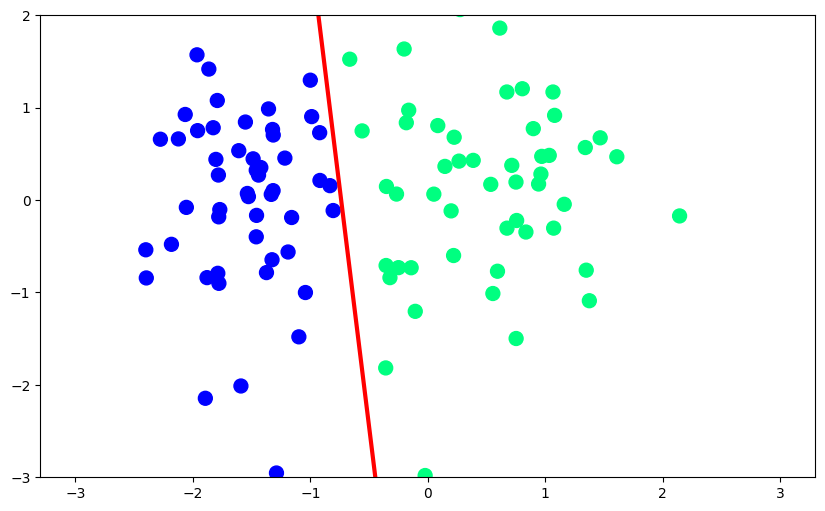

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c= y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [11]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

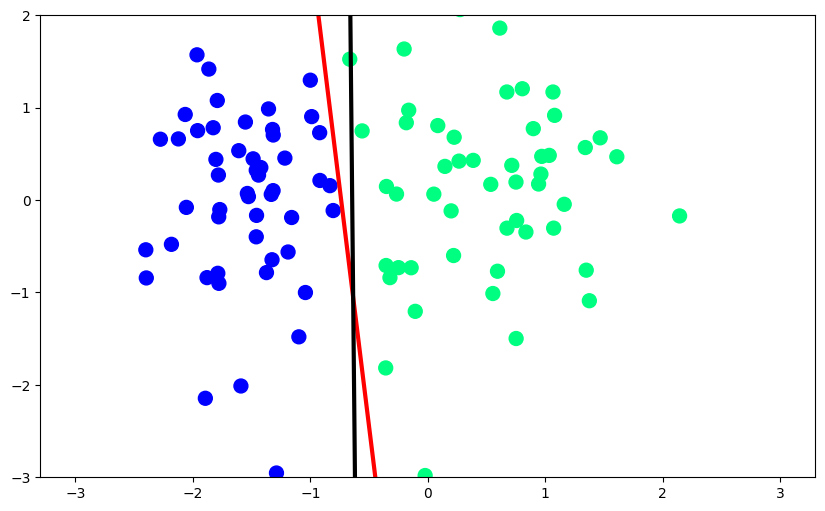

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0], X[:,1], c= y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

In [13]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [14]:
epochs = 1000
def perceptron(X,y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(epochs):
    ind = np.random.randint(0,100)
    y_hat = sigmoid(np.dot(X[ind], weights))
    weights = weights + lr * (y[ind]- y_hat)*X[ind]
  return weights[0], weights[1:]

In [15]:
intercept_, coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

2.523745773745578
[ 4.66204192 -0.05823969]


In [16]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m * x_input2 + b

(-3.0, 2.0)

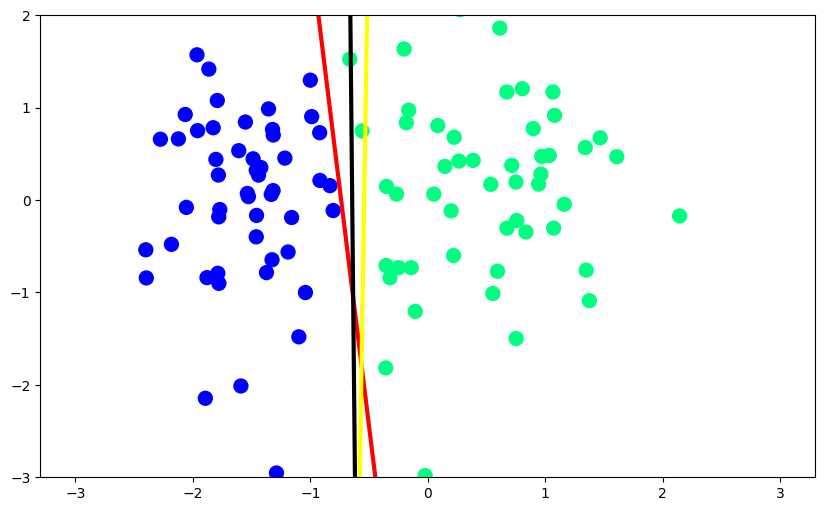

In [17]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1,y_input1,color='black', linewidth = 3)
plt.plot(x_input2,y_input2,color='yellow', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c= y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

In [18]:
epochs = 5000
def gd(X,y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.5
  for i in range(epochs):
    y_hat = sigmoid(np.dot(X, weights))
    weights = weights + lr * np.dot((y- y_hat),X)/X.shape[0]
  return weights[0], weights[1:]

In [19]:
intercept_, coef_ = gd(X,y)
print(intercept_)
print(coef_)

7.890931726180508
[11.9130685   0.80686829]


In [20]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input3 = np.linspace(-3, 3, 100)
y_input3 = m * x_input3 + b

(-3.0, 2.0)

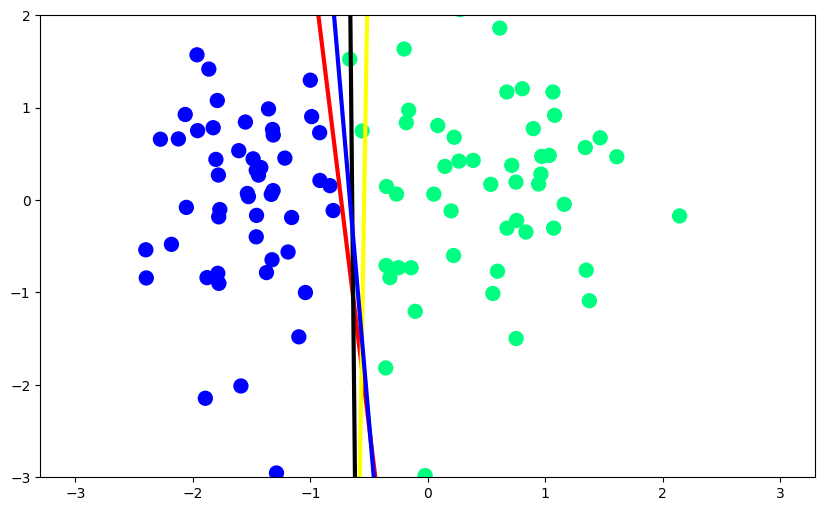

In [21]:
plt.figure(figsize = (10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1,y_input1,color='black', linewidth = 3)
plt.plot(x_input2,y_input2,color='yellow', linewidth = 3)
plt.plot(x_input3,y_input3,color='blue', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c= y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)

## Softmax Regression

In [23]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = sns.load_dataset('iris')

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df = df[['sepal_length', 'petal_length', 'species']]

In [29]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [31]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [34]:
clf = LogisticRegression(multi_class='multinomial')

In [36]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
y_pred = clf.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [40]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [44]:
qpo = np.array([[3.4, 2.7]])
clf.predict_proba(qpo)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [45]:
clf.predict(qpo)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


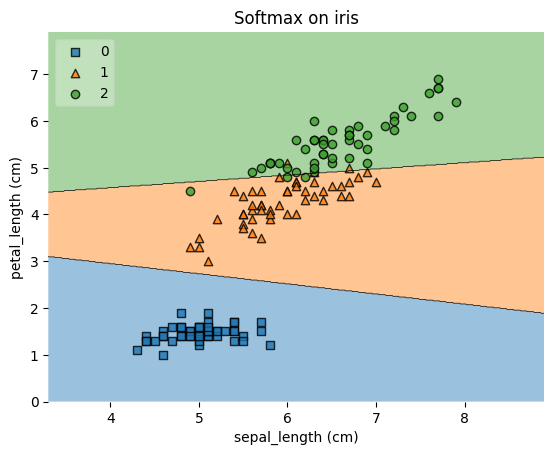

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel('sepal_length (cm)')
plt.ylabel('petal_length (cm)')
plt.title('Softmax on iris')

plt.show()